In [1]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
datasets = pd.read_csv("HepatitisCdata.csv")

In [3]:
datasets.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [4]:
datasets=datasets.drop(['Unnamed: 0'], axis=1)

In [5]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


In [6]:
datasets.nunique()

Category      5
Age          49
Sex           2
ALB         189
ALP         414
ALT         341
AST         297
BIL         188
CHE         407
CHOL        313
CREA        117
GGT         358
PROT        198
dtype: int64

In [7]:
datasets.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [8]:
datasets['ALB'].fillna(datasets['ALB'].mean(), inplace=True)
datasets['ALP'].fillna(datasets['ALP'].mean(), inplace=True)
datasets['ALT'].fillna(datasets['ALT'].mean(), inplace=True)
datasets['CHOL'].fillna(datasets['CHOL'].mean(), inplace=True)
datasets['PROT'].fillna(datasets['PROT'].mean(), inplace=True)

In [9]:
datasets.isnull().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

In [10]:
li = list(datasets["Category"])
li2 = []
for i in range(len(li)) :
    if li[i] == "0=Blood Donor":
            li2.append(0)
    elif li[i] == "0s=suspect Blood Donor":
        li2.append(1)
    elif li[i] == "1=Hepatitis":
        li2.append(2)
    else :
        li2.append(3)
datasets["NewCategory"]= li2

In [11]:
datasets=datasets.drop(['Category'], axis=1)

In [12]:
datasets

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,NewCategory
0,32,m,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0
1,32,m,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0
2,32,m,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0
3,32,m,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0
4,32,m,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,f,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,3
611,64,f,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,3
612,64,f,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,3
613,46,f,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,3


In [13]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
datasets['Sex'] = enc.fit_transform(datasets['Sex'].values)

In [14]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          615 non-null    int64  
 1   Sex          615 non-null    int32  
 2   ALB          615 non-null    float64
 3   ALP          615 non-null    float64
 4   ALT          615 non-null    float64
 5   AST          615 non-null    float64
 6   BIL          615 non-null    float64
 7   CHE          615 non-null    float64
 8   CHOL         615 non-null    float64
 9   CREA         615 non-null    float64
 10  GGT          615 non-null    float64
 11  PROT         615 non-null    float64
 12  NewCategory  615 non-null    int64  
dtypes: float64(10), int32(1), int64(2)
memory usage: 60.2 KB


In [15]:
atr_datasets = datasets.drop(columns='NewCategory')
atr_datasets

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,1,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,1,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,1,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,1,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,1,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,0,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,64,0,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,64,0,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,46,0,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [16]:
cls_datasets = datasets['NewCategory']
cls_datasets

0      0
1      0
2      0
3      0
4      0
      ..
610    3
611    3
612    3
613    3
614    3
Name: NewCategory, Length: 615, dtype: int64

In [17]:
datasets = datasets.to_numpy()
datasets

array([[32. ,  1. , 38.5, ..., 12.1, 69. ,  0. ],
       [32. ,  1. , 38.5, ..., 15.6, 76.5,  0. ],
       [32. ,  1. , 46.9, ..., 33.2, 79.3,  0. ],
       ...,
       [64. ,  0. , 29. , ..., 64.2, 82. ,  3. ],
       [46. ,  0. , 33. , ..., 50. , 71. ,  3. ],
       [59. ,  0. , 36. , ..., 34. , 68. ,  3. ]])

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [19]:
x_train, x_test, y_train, y_test = train_test_split(atr_datasets, cls_datasets, test_size=0.2, random_state=42)

In [20]:
tree_datasets = DecisionTreeClassifier(random_state=42)
tree_datasets.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [21]:
y_pred = tree_datasets.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)
akurasi = classification_report(y_test, y_pred)
print("Tingkat akurasi algoritma C4.5")
print("Akurasi : ", akurasi)
akurasi = accuracy_score(y_test, y_pred)
print("Tingkat Akurasi : %d persen" %(akurasi*100))

Confusion Matrix
[[95  0  1  0]
 [ 2  0  1  0]
 [ 3  0  3  3]
 [ 5  1  1  8]]
Tingkat akurasi algoritma C4.5
Akurasi :                precision    recall  f1-score   support

           0       0.90      0.99      0.95        96
           1       0.00      0.00      0.00         3
           2       0.50      0.33      0.40         9
           3       0.73      0.53      0.62        15

    accuracy                           0.86       123
   macro avg       0.53      0.46      0.49       123
weighted avg       0.83      0.86      0.84       123

Tingkat Akurasi : 86 persen


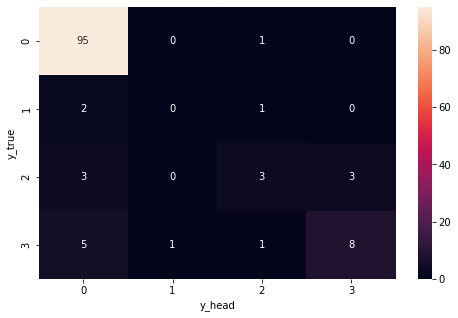

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

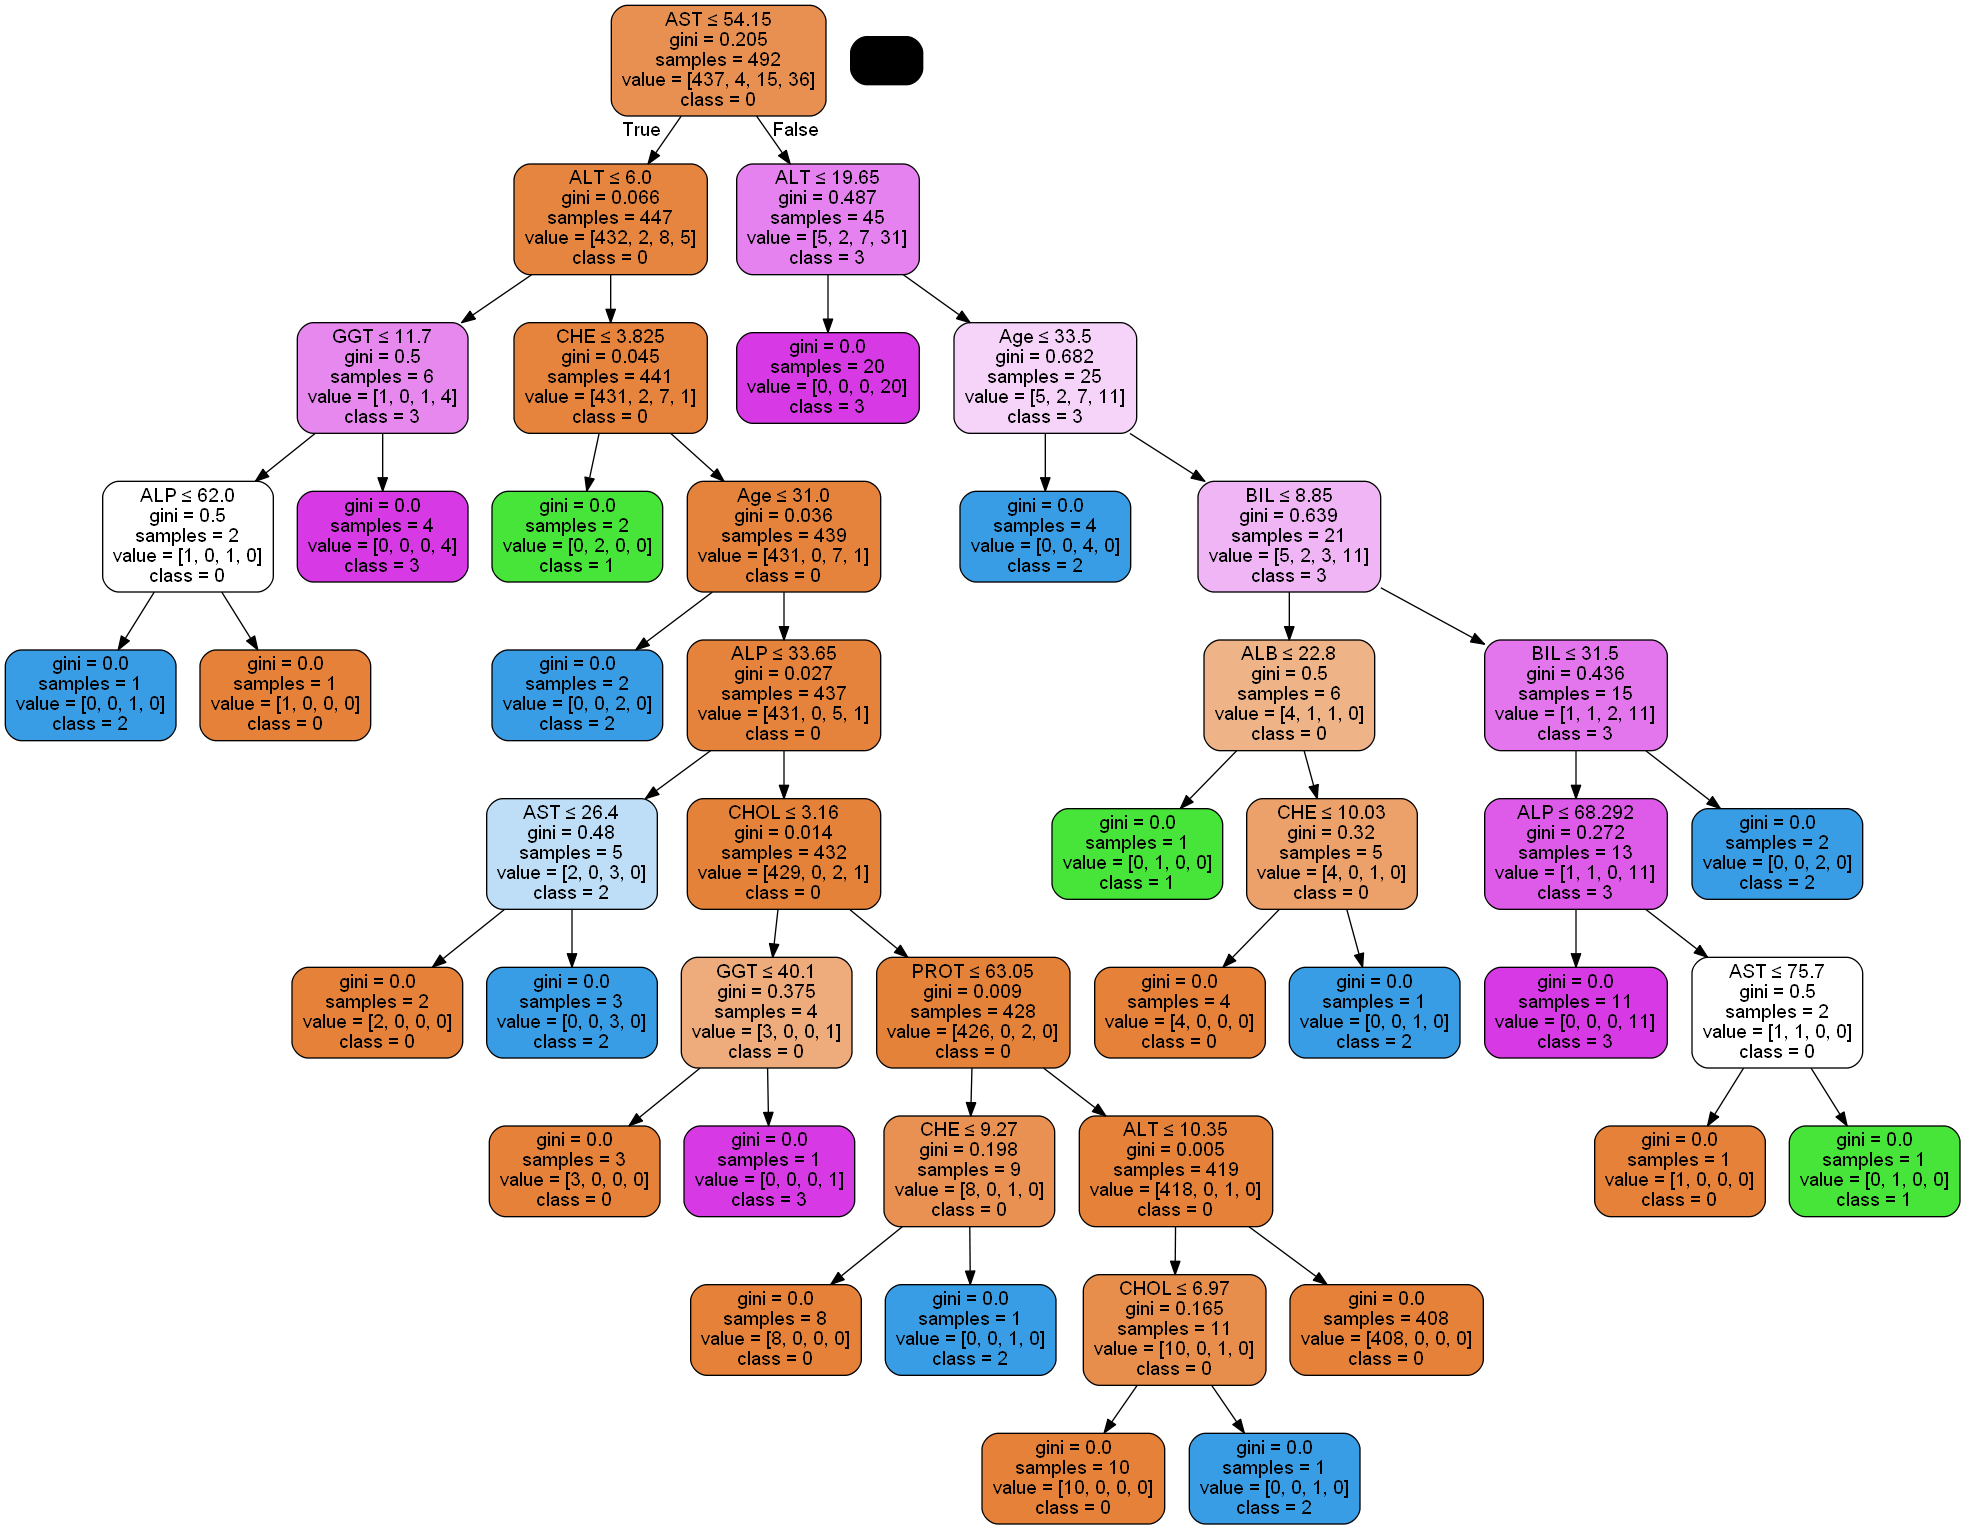

In [23]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

tree_stroke = StringIO()
export_graphviz(tree_datasets, out_file=tree_stroke, class_names=["0", "1", "2", "3"],
               feature_names=atr_datasets.columns, rounded=True, special_characters=True, filled=True)
graph = pydotplus.graph_from_dot_data(tree_stroke.getvalue())  
graph.write_png('Hepatitis C.png')
Image(graph.create_png())

In [24]:
# Membuat object classifier pohon keputusan
tree_datasets = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Melatih pengklasifikasi pohon keputusan
tree_datasets = tree_datasets.fit(x_train,y_train)

# Memprediksi respons untuk kumpulan data pengujian
y_pred = tree_datasets.predict(x_test)

# Akurasi Model
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy :  86.1788617886179


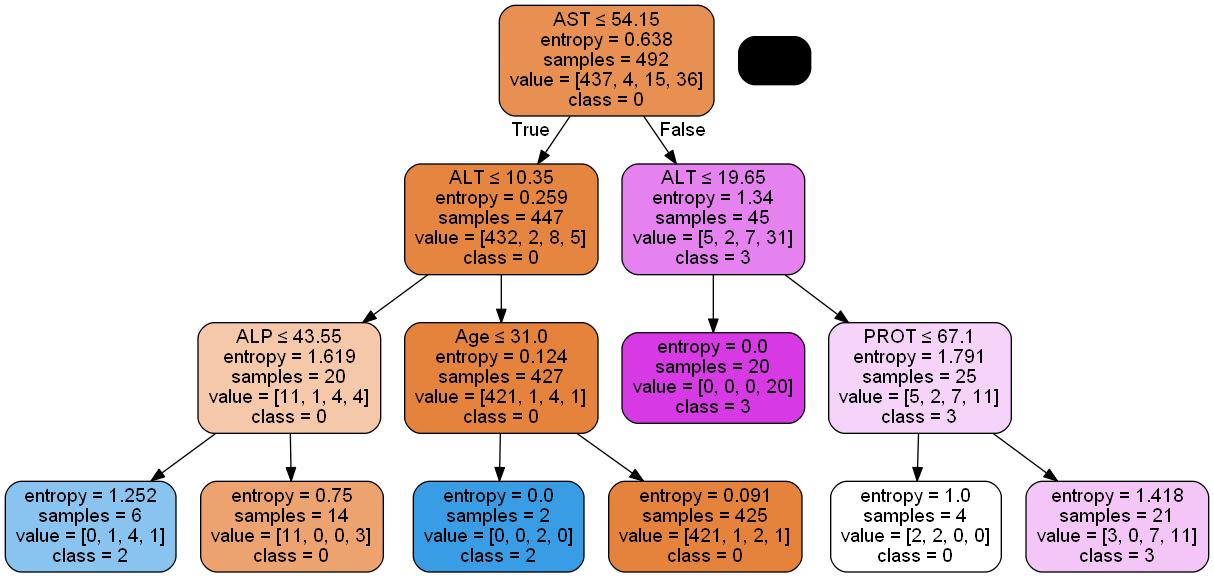

In [25]:
# Visualisasi pohon keputusan yang lebih baik
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

tree_stroke = StringIO()
export_graphviz(tree_datasets, out_file=tree_stroke, class_names=["0", "1", "2", "3"],
               feature_names=atr_datasets.columns, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(tree_stroke.getvalue())  
graph.write_png('Hepatitis C2.png')
Image(graph.create_png())